##Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalizationtrain_dir = 'train'
from keras.utils import to_categorical

## Loading and Preprocessing Dataset

In [ ]:
train_dir = 'train'

In [ ]:
def load_dataset(train_dir):
    images = []
    labels = []
    label_names = sorted(os.listdir(train_dir))

    for label in label_names:
        label_dir = os.path.join(train_dir, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith('.png') or filename.endswith('.jpg'):
                    image_path = os.path.join(label_dir, filename)
                    image = Image.open(image_path).convert('RGB')
                    image = image.resize((32, 32))  # Resize image to target size
                    images.append(np.array(image))
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [ ]:
images, labels = load_dataset(train_dir)

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [ ]:
# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_validation, y_train, y_validation = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [ ]:
# Calculate mean pixel value of the training set
mean_value = np.mean(X_train, axis=(0, 1, 2))

In [ ]:
# Normalize the datasets by subtracting the mean
X_train = X_train - mean_value
X_validation = X_validation - mean_value

In [ ]:
# Number of classes
num_classes = len(np.unique(labels_encoded))

In [ ]:
num_classes

10

##One-Hot Encoding

In [ ]:
# One-hot encode the targets
y_train = to_categorical(y_train, num_classes)
y_validation = to_categorical(y_validation, num_classes)

## CNN Architecture

In [ ]:
# Creating a sequential model and adding layers to it
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_validation, y_validation))

Epoch 1/30
1125/1125 [==============================] - 165s 145ms/step - loss: 1.8326 - accuracy: 0.3503 - val_loss: 1.4505 - val_accuracy: 0.4703
Epoch 2/30
1125/1125 [==============================] - 165s 147ms/step - loss: 1.4027 - accuracy: 0.4877 - val_loss: 1.2117 - val_accuracy: 0.5634
Epoch 3/30
1125/1125 [==============================] - 190s 168ms/step - loss: 1.2729 - accuracy: 0.5391 - val_loss: 1.1335 - val_accuracy: 0.5892
Epoch 4/30
1125/1125 [==============================] - 179s 159ms/step - loss: 1.1983 - accuracy: 0.5677 - val_loss: 1.0721 - val_accuracy: 0.6111
Epoch 5/30
1125/1125 [==============================] - 173s 154ms/step - loss: 1.1428 - accuracy: 0.5909 - val_loss: 1.0127 - val_accuracy: 0.6339
Epoch 6/30
1125/1125 [==============================] - 170s 151ms/step - loss: 1.0924 - accuracy: 0.6131 - val_loss: 0.9672 - val_accuracy: 0.6522
Epoch 7/30
1125/1125 [==============================] - 177s 158ms/step - loss: 1.0538 - accuracy: 0.6258 - val_

In [ ]:
# Save the trained model
model.save('CNN-Model.keras')

In [ ]:
loss, accuracy = model.evaluate(X_validation, y_validation)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

563/563 [==============================] - 12s 20ms/step - loss: 0.7600 - accuracy: 0.7301
Test Loss: 0.7600
Test Accuracy: 0.7301


In [ ]:
test_images_folder = 'Kaggle_test_images'  # Path to the folder containing test images
target_size = (32, 32)  # Target size for resizing

In [ ]:
# Prepare lists to store test images and their IDs
test_images = []
test_image_ids = []

In [ ]:
# Process each image in the test folder
for image_file in os.listdir(test_images_folder):
    image_path = os.path.join(test_images_folder, image_file)

    # Load and preprocess the image using PIL
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)

    test_images.append(img)
    test_image_ids.append(image_file)

In [ ]:
# Convert to numpy array
test_images = np.array(test_images)
test_images = test_images - mean_value

In [ ]:
# Predict the labels for the test images
predictions = model.predict(test_images)

313/313 [==============================] - 6s 18ms/step


In [ ]:
# Convert predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    'id': test_image_ids,
    'label': predicted_labels
})

In [ ]:
# Save to CSV
df.to_csv('F2021065198.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

##Visualizations

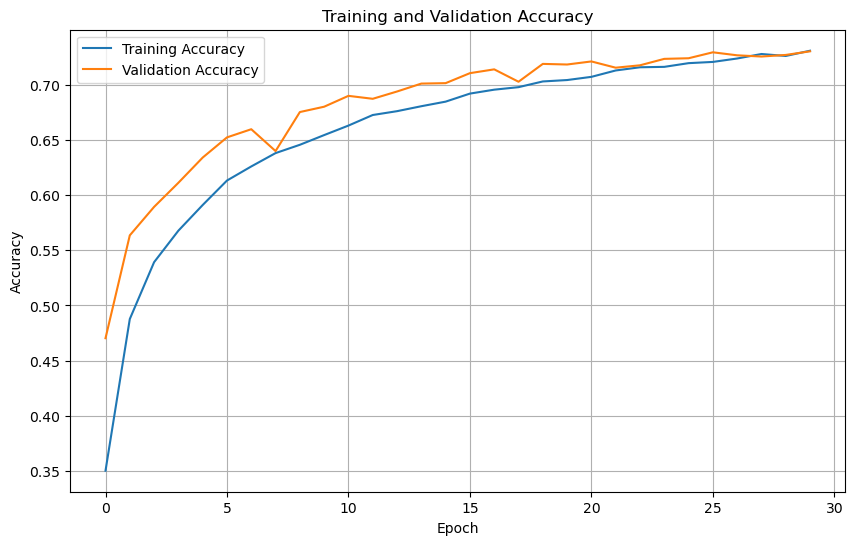

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

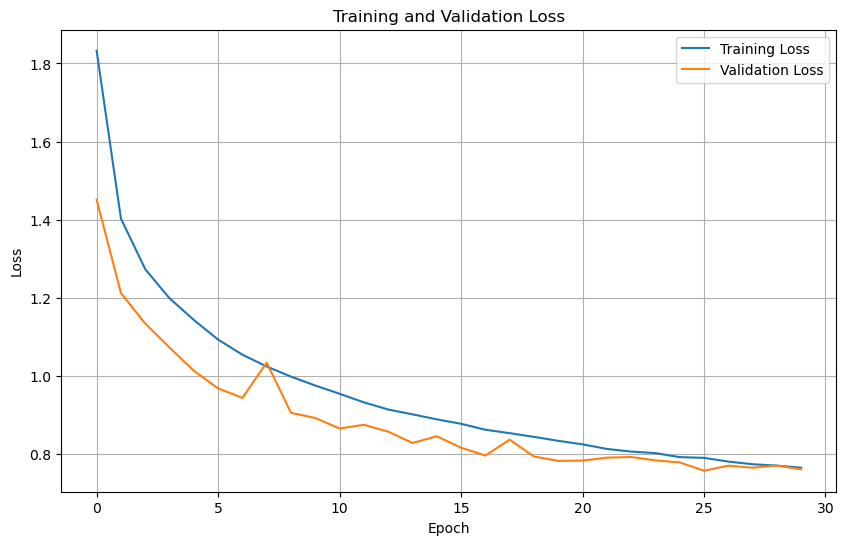

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
1125/1125 [==============================] - 168s 149ms/step - loss: 0.7584 - accuracy: 0.7325 - val_loss: 0.7521 - val_accuracy: 0.7315
Epoch 2/10
1125/1125 [==============================] - 178s 158ms/step - loss: 0.7523 - accuracy: 0.7328 - val_loss: 0.7408 - val_accuracy: 0.7396
Epoch 3/10
1125/1125 [==============================] - 174s 155ms/step - loss: 0.7479 - accuracy: 0.7339 - val_loss: 0.7711 - val_accuracy: 0.7261
Epoch 4/10
1125/1125 [==============================] - 170s 151ms/step - loss: 0.7463 - accuracy: 0.7361 - val_loss: 0.7512 - val_accuracy: 0.7376
Epoch 5/10
1125/1125 [==============================] - 175s 156ms/step - loss: 0.7413 - accuracy: 0.7386 - val_loss: 0.7493 - val_accuracy: 0.7389
Epoch 6/10
1125/1125 [==============================] - 176s 157ms/step - loss: 0.7366 - accuracy: 0.7388 - val_loss: 0.7295 - val_accuracy: 0.7442
Epoch 7/10
1125/1125 [==============================] - 170s 151ms/step - loss: 0.7319 - accuracy: 0.7401 - val_

In [ ]:
# Save the trained model
model.save('CNN-Model-1.keras')

In [ ]:
loss, accuracy = model.evaluate(X_validation, y_validation)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

563/563 [==============================] - 15s 26ms/step - loss: 0.7364 - accuracy: 0.7413
Test Loss: 0.7364
Test Accuracy: 0.7413


## Loading and Processing Test Dataset

In [ ]:
test_images_folder = 'Kaggle_test_images'  # Path to the folder containing test images
target_size = (32, 32)  # Target size for resizing

In [ ]:
# Prepare lists to store test images and their IDs
test_images = []
test_image_ids = []

In [ ]:
# Process each image in the test folder
for image_file in os.listdir(test_images_folder):
    image_path = os.path.join(test_images_folder, image_file)

    # Load and preprocess the image using PIL
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)

    test_images.append(img)
    test_image_ids.append(image_file)

In [ ]:
# Convert to numpy array
test_images = np.array(test_images)
test_images = test_images - mean_value

In [ ]:
# Predict the labels for the test images
predictions = model.predict(test_images)

313/313 [==============================] - 8s 26ms/step


In [ ]:
# Convert predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    'id': test_image_ids,
    'label': predicted_labels
})

In [ ]:
# Save to CSV
df.to_csv('F2021065198.csv', index=False)

In [ ]:
# Train the model
history_1 = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_validation, y_validation))

Epoch 1/5
563/563 [==============================] - 164s 291ms/step - loss: 0.6169 - accuracy: 0.7799 - val_loss: 0.7039 - val_accuracy: 0.7543
Epoch 2/5
563/563 [==============================] - 167s 297ms/step - loss: 0.6088 - accuracy: 0.7827 - val_loss: 0.7144 - val_accuracy: 0.7541
Epoch 3/5
563/563 [==============================] - 176s 313ms/step - loss: 0.6159 - accuracy: 0.7797 - val_loss: 0.7119 - val_accuracy: 0.7557
Epoch 4/5
563/563 [==============================] - 193s 344ms/step - loss: 0.6132 - accuracy: 0.7813 - val_loss: 0.7112 - val_accuracy: 0.7570
Epoch 5/5
563/563 [==============================] - 194s 345ms/step - loss: 0.6100 - accuracy: 0.7817 - val_loss: 0.7104 - val_accuracy: 0.7511


In [ ]:
# Save the trained model
model.save('CNN-Model-4.keras')

In [ ]:
loss, accuracy = model.evaluate(X_validation, y_validation)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

563/563 [==============================] - 14s 26ms/step - loss: 0.7104 - accuracy: 0.7511
Test Loss: 0.7104
Test Accuracy: 0.7511


In [ ]:
# Predict the labels for the test images
predictions = model.predict(test_images)

313/313 [==============================] - 9s 27ms/step


In [ ]:
# Convert predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    'id': test_image_ids,
    'label': predicted_labels
})

In [ ]:
# Save to CSV
df.to_csv('F2021065198.csv', index=False)